In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

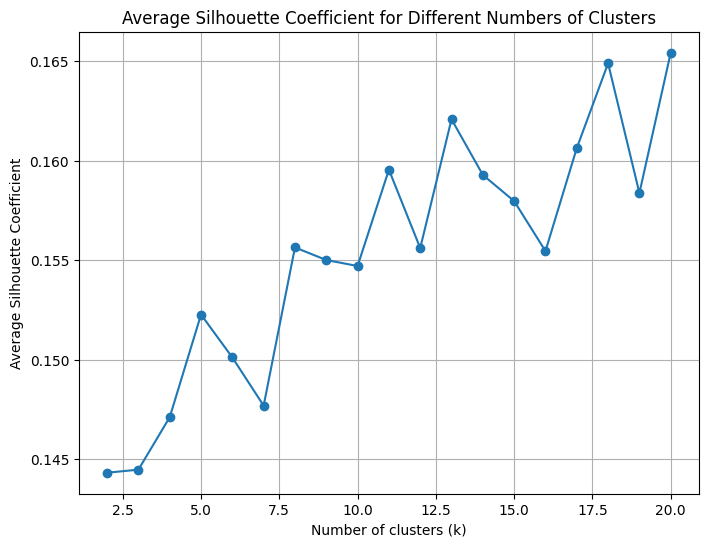

The best k value is: 20 with an average Silhouette coefficient of 0.16543563726624314.


In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

data = pd.read_csv("google_review_ratings.csv")
data.dropna(inplace=True)
numerical_data = data.select_dtypes(include=[np.number])

k_values = range(2, 21)
avg_silhouette_scores = []

for k in k_values:
    silhouette_scores = []

    # Check if number of clusters is not more than the number of samples
    if len(numerical_data) > k:
        for _ in range(5):
            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(numerical_data)
            labels = kmeans.labels_
            silhouette_avg = silhouette_score(numerical_data, labels)
            silhouette_scores.append(silhouette_avg)

        avg_silhouette = np.mean(silhouette_scores)
        avg_silhouette_scores.append(avg_silhouette)
    else:
        # If the number of clusters is greater than or equal to the number of samples, append NaN
        avg_silhouette_scores.append(np.nan)

# Plotting the average Silhouette coefficients for different k values
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(k_values, avg_silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Coefficient')
plt.title('Average Silhouette Coefficient for Different Numbers of Clusters')
plt.grid(True)
plt.show()

best_k = np.nanargmax(avg_silhouette_scores) + 2
best_avg_silhouette = max(avg_silhouette_scores)

print(f"The best k value is: {best_k} with an average Silhouette coefficient of {best_avg_silhouette}.")


In [6]:

kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(numerical_data)

centroids = kmeans.cluster_centers_
print(f"Centroids of the clusters:\n{centroids}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centroids of the clusters:
[[1.2337395  3.67197479 2.39235294 2.12457983 2.45932773 3.47004202
  4.58596639 3.41848739 3.96932773 2.85386555 2.49840336 2.13726891
  2.10478992 4.31239496 0.93315126 0.73945378 0.73558824 0.72806723
  0.72142857 0.93105042 0.74285714 0.75331933 0.78836134 1.08806723]
 [2.29323944 2.11394366 1.78450704 1.51521127 1.39943662 1.34704225
  1.35760563 1.2771831  1.51859155 1.21507042 0.99197183 0.9715493
  2.13323944 4.21633803 1.48014085 1.5871831  1.69873239 1.77943662
  3.96788732 4.08901408 3.01873239 3.61126761 2.6615493  2.58605634]
 [2.015875   2.31641667 2.12575    2.17983333 2.095      1.95429167
  2.19391667 1.77841667 1.848375   1.76208333 1.77054167 1.80854167
  1.90120833 2.30333333 2.28154167 1.73504167 2.769      3.21383333
  3.82925    1.41566667 1.39591667 1.958125   2.04208333 2.28529167]
 [1.26262206 1.51428571 1.64068716 2.18976492 2.25520796 2.38858951
  3.45372514 3.59994575 4.45155515 4.44971067 4.96779385 2.17117541
  1.72877034 1.3216

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


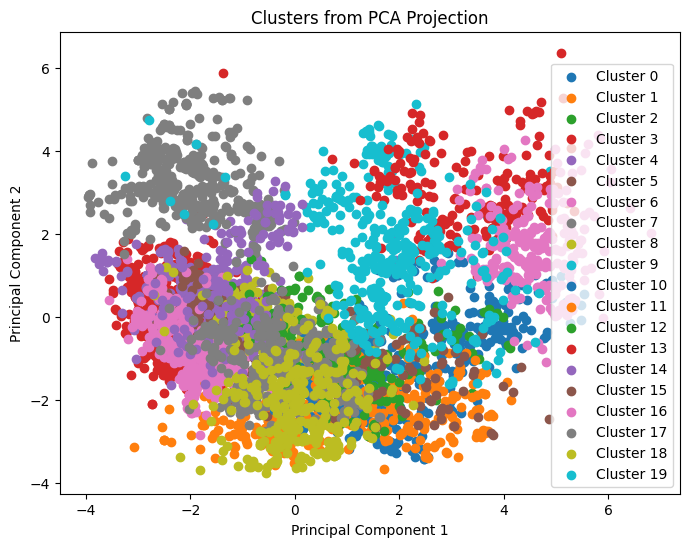

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('google_review_ratings.csv')

numeric_columns = data.select_dtypes(include=[np.number]).columns
non_numeric_columns = [col for col in data.columns if col not in numeric_columns]

imputer = SimpleImputer(strategy='mean')
data[numeric_columns] = imputer.fit_transform(data[numeric_columns])

X = data[numeric_columns].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

best_kmeans = KMeans(n_clusters=best_k, random_state=42)
best_kmeans.fit(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
for i in range(best_k):
    plt.scatter(X_pca[best_kmeans.labels_ == i, 0], X_pca[best_kmeans.labels_ == i, 1], label=f'Cluster {i}')
plt.title('Clusters from PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


Are the found clusters well separated in the
visualization?

Is that observation consistent with the computed Silhouette coefficient?   

No they are not well seperated

according to the given plot and what I observed both of them are close to each other

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


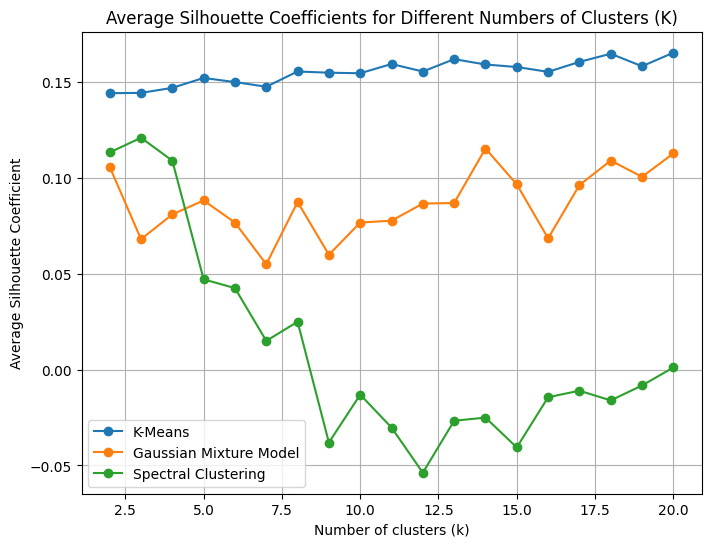

The method with the highest average Silhouette coefficient is: K-Means.


In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

data = pd.read_csv("google_review_ratings.csv")
data = data.dropna()
data=data.iloc[:,1:25]
numerical_data=data.values

# data.dropna(inplace=True)
# numerical_data = data.select_dtypes(include=[np.number])

k_values = range(2, 21)

avg_silhouette_scores_kmeans = []
avg_silhouette_scores_gmm = []
avg_silhouette_scores_spectral = []

for k in k_values:
    print(k)
    silhouette_scores_kmeans = []
    silhouette_scores_gmm = []
    silhouette_scores_spectral = []

    for _ in range(5):
        # K-Means
        kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
        kmeans.fit(numerical_data)
        labels_kmeans = kmeans.labels_
        silhouette_kmeans = silhouette_score(numerical_data, labels_kmeans)
        silhouette_scores_kmeans.append(silhouette_kmeans)

        # Gaussian Mixture Model (GMM)
        gmm = GaussianMixture(n_components=k, random_state=42,n_init=10)
        gmm.fit(numerical_data)
        labels_gmm = gmm.predict(numerical_data)
        silhouette_gmm = silhouette_score(numerical_data, labels_gmm)
        silhouette_scores_gmm.append(silhouette_gmm)

        # Spectral Clustering
        spectral = SpectralClustering(n_clusters=k, random_state=42,n_init=10, affinity ='nearest_neighbors')
        spectral.fit(numerical_data)
        labels_spectral = spectral.labels_
        silhouette_spectral = silhouette_score(numerical_data, labels_spectral)
        silhouette_scores_spectral.append(silhouette_spectral)

    avg_silhouette_kmeans = np.mean(silhouette_scores_kmeans)
    avg_silhouette_gmm = np.mean(silhouette_scores_gmm)
    avg_silhouette_spectral = np.mean(silhouette_scores_spectral)

    avg_silhouette_scores_kmeans.append(avg_silhouette_kmeans)
    avg_silhouette_scores_gmm.append(avg_silhouette_gmm)
    avg_silhouette_scores_spectral.append(avg_silhouette_spectral)

plt.figure(figsize=(8, 6))
plt.plot(k_values, avg_silhouette_scores_kmeans, marker='o', label='K-Means')
plt.plot(k_values, avg_silhouette_scores_gmm, marker='o', label='Gaussian Mixture Model')
plt.plot(k_values, avg_silhouette_scores_spectral, marker='o', label='Spectral Clustering')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Coefficient')
plt.title('Average Silhouette Coefficients for Different Numbers of Clusters (K)')
plt.legend()
plt.grid(True)
plt.show()

# Find the maximum silhouette score among all methods
max_avg_silhouette = max(max(avg_silhouette_scores_kmeans), max(avg_silhouette_scores_gmm), max(avg_silhouette_scores_spectral))

# Determine the method with the highest silhouette score
if max_avg_silhouette in avg_silhouette_scores_kmeans:
    best_method = 'K-Means'
elif max_avg_silhouette in avg_silhouette_scores_gmm:
    best_method = 'Gaussian Mixture Model'
elif max_avg_silhouette in avg_silhouette_scores_spectral:
    best_method = 'Spectral Clustering'

print(f"The method with the highest average Silhouette coefficient is: {best_method}.")


In [19]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('google_review_ratings.csv')

numeric_columns = data.select_dtypes(include=[np.number]).columns
non_numeric_columns = [col for col in data.columns if col not in numeric_columns]

imputer = SimpleImputer(strategy='mean')
data[numeric_columns] = imputer.fit_transform(data[numeric_columns])

X = data[numeric_columns].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

silhouette = silhouette_score(X_scaled, dbscan_labels)
print(f"Silhouette coefficient for DBSCAN: {silhouette}")


Silhouette coefficient for DBSCAN: -0.3295493203476188
